In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
data = pd.read_excel('house_data.xlsx')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


```
1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso
exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que
puedan afectar la calidad del modelo, si los hay.
```

In [6]:

# Mostrar información general sobre el dataframe
print("Información general del dataframe:")
print(data.info())

# Mostrar estadísticas descriptivas para identificar posibles valores atípicos
print("\nEstadísticas descriptivas del dataframe:")
print(data.describe())

# Contar valores faltantes por columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Eliminar filas con valores faltantes
data = data.dropna()

# Eliminar duplicados
data = data.drop_duplicates()

# Mostrar el tamaño del dataframe después de la limpieza
print("\nTamaño del dataframe después de la limpieza:")
print(data.shape)


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            

```
2. Realizar un análisis descriptivo de las variables para entender la distribución de los
datos y detectar posibles relaciones entre las características y los precios. En esto
debes incluir un análisis de correlaciones entre las variables principalmente con el
precio de las casas
```

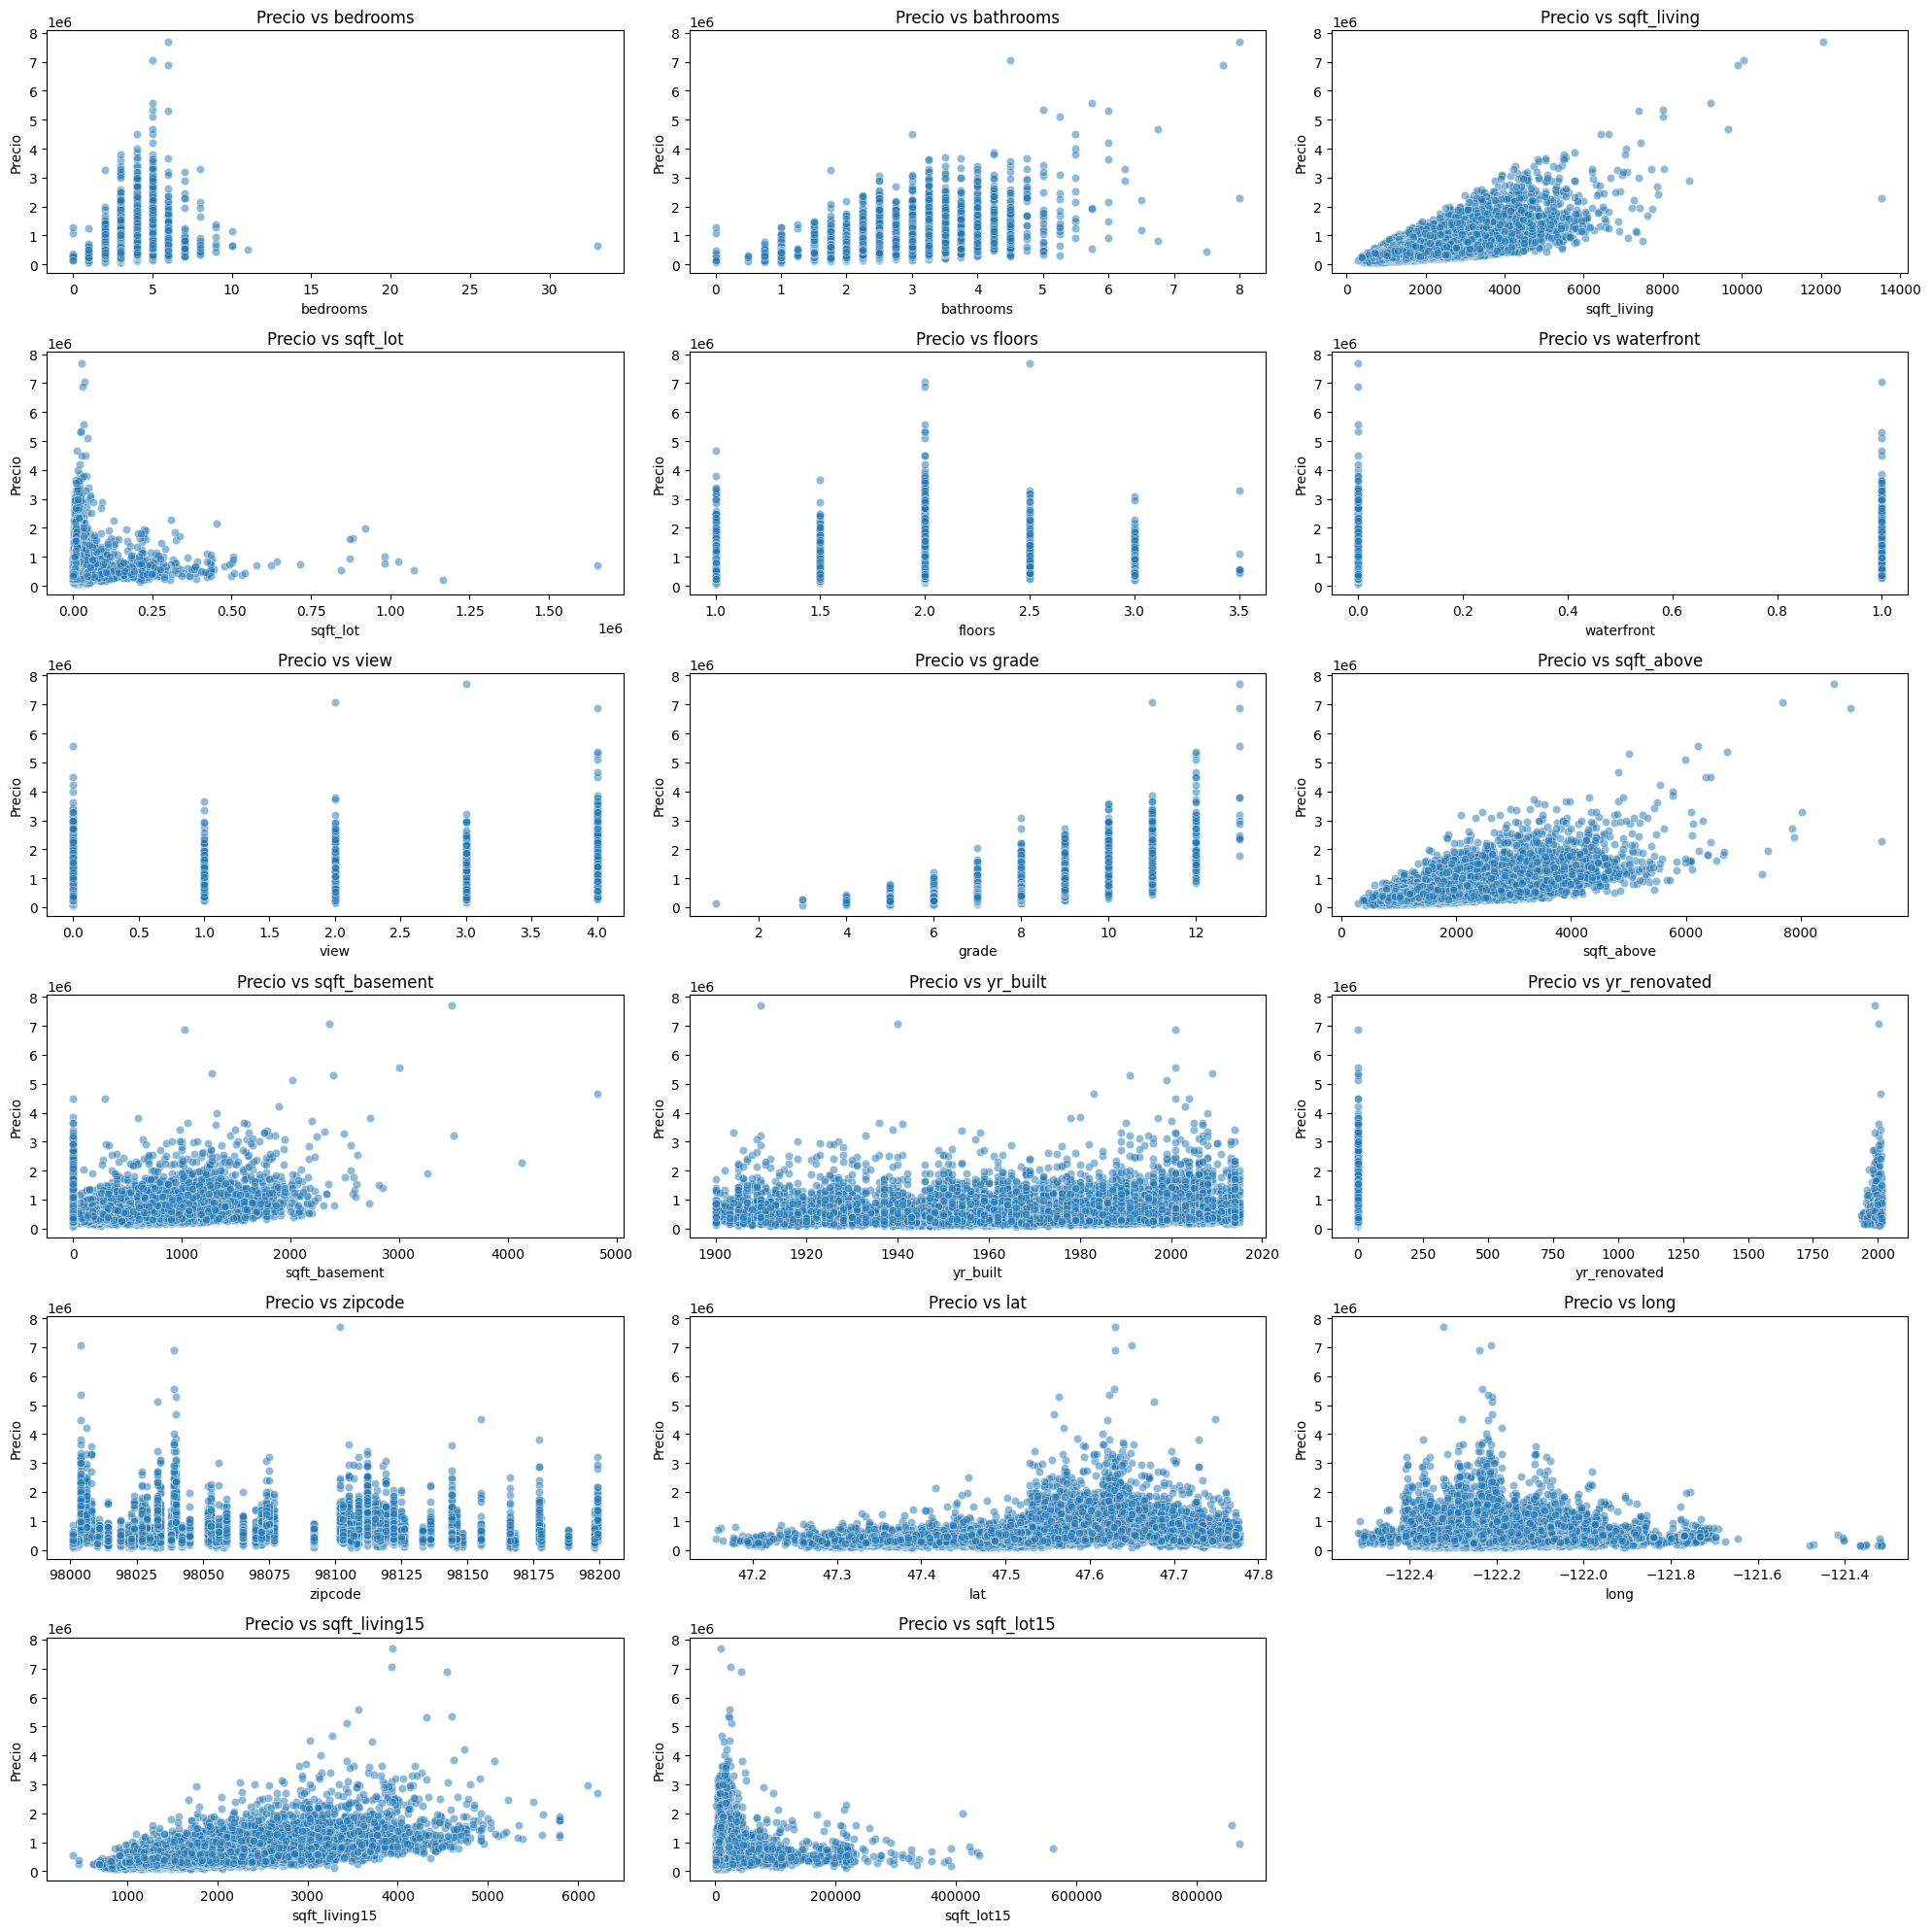

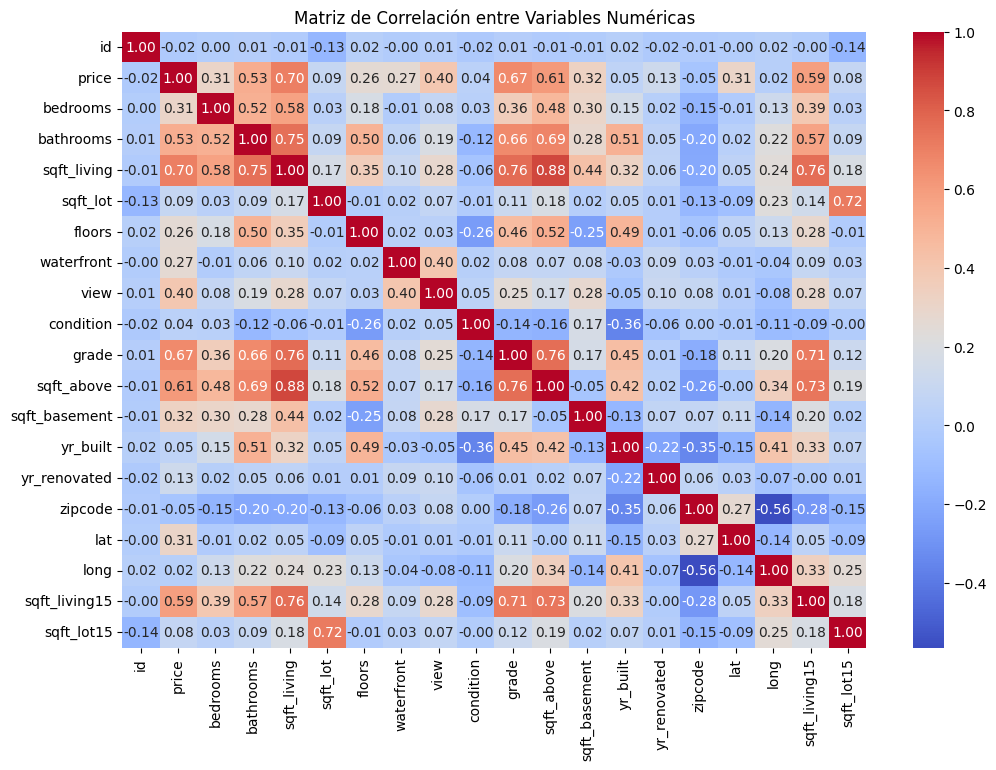

In [9]:
# Gráficos de dispersión entre las características y el precio
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(x=feature, y='price', data=data, alpha=0.5)
    plt.title(f'Precio vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Precio')
plt.tight_layout()
plt.show()

# Seleccionar solo las columnas numéricas del dataframe
numeric_cols = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

```
3. Aplicar técnicas de transformación de datos, como normalización o estandarización,
para asegurar que las variables estén en una escala comparable. Luego de ello,
divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera
aleatoria o estratificada.

```

In [12]:
# Excluir la columna 'date' antes de la estandarización
X = data.drop(columns=['price', 'date'])  # Características excluyendo 'price' y 'date'
y = data['price']  # Variable objetivo

# Normalización o estandarización de las características
scaler = StandardScaler()  # Creamos un objeto para estandarizar los datos
X_scaled = scaler.fit_transform(X)  # Aplicamos la estandarización a las características

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Dimensiones de los conjuntos de entrenamiento y prueba:
X_train shape: (17290, 19)
y_train shape: (17290,)
X_test shape: (4323, 19)
y_test shape: (4323,)


In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

```
4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o
Elastic Net y ajuste los hiper parámetros mostrando como se mueve los
hiperparametros y el ajuste. Además, debes construir modelos de árboles de
regresión para capturar relaciones no lineales y complejas entre las variables
predictoras y el precio de las casas.
```

c:\Users\luist\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\luist\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\luist\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

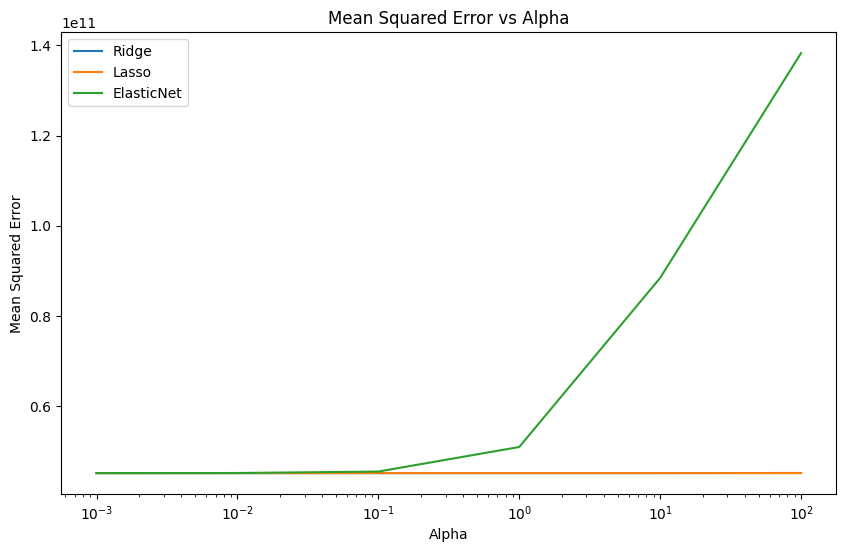

In [21]:
# Ridge Regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_scores = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, max_iter=10000)
    ridge_model.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge_model.predict(X_test)))

# Lasso Regression
lasso_scores = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    lasso_scores.append(mean_squared_error(y_test, lasso_model.predict(X_test)))

# ElasticNet Regression
elasticnet_scores = []

for alpha in alpha_values:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Usamos l1_ratio=0.5 para un mix entre L1 y L2
    elasticnet_model.fit(X_train, y_train)
    elasticnet_scores.append(mean_squared_error(y_test, elasticnet_model.predict(X_test)))

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, ridge_scores, label='Ridge')
plt.plot(alpha_values, lasso_scores, label='Lasso')
plt.plot(alpha_values, elasticnet_scores, label='ElasticNet')
plt.title('Mean Squared Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.show()


```
Arbol regresion
```

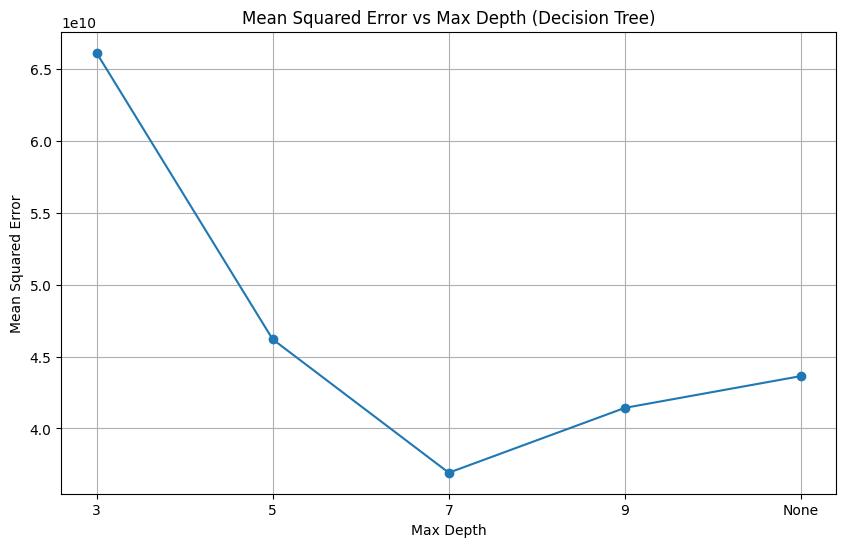

In [18]:
# Remover el valor None de max_depth_values
max_depth_values = [3, 5, 7, 9, None]
max_depth_values_for_plot = [depth if depth is not None else "None" for depth in max_depth_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values_for_plot, tree_scores, marker='o')
plt.title('Mean Squared Error vs Max Depth (Decision Tree)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


```
5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
rendimiento del modelo y concluir sobre ellos
```

In [19]:


# Entrenar los modelos de regresión (ya sea Ridge, Lasso, ElasticNet o DecisionTreeRegressor)

# Por ejemplo, vamos a suponer que ya tienes entrenado un modelo de regresión llamado ridge_model
ridge_model.fit(X_train, y_train)

# Predecir los valores de las etiquetas para los datos de prueba
y_pred = ridge_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Métricas de evaluación del modelo:")
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)


Métricas de evaluación del modelo:
Error Cuadrático Medio (MSE): 45193422860.38758
Error Absoluto Medio (MAE): 127286.04652219445
Coeficiente de Determinación (R²): 0.7010556574110319
